In [2]:
#pip install matplotlib

In [4]:
# Getting started

# A simple notebooks for testing some analyses on the first version of the questionnaire.
# Data are not pushed to github due to privacy reasons. 
# The treated_data.csv should be copied to the data/ folder. 

# Let's first load the data to understand its structure and then compute general statistical information.
import pandas as pd

# Load the data
file_path = '../data/Treated_data.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
dataset.head()


,Unnamed: 0,TITRE,ANNEE,PAYS,CANAL,TYPE,SAISON,LIEU(X) DE L'ACTION,EPOQUE DU RECIT,TRAITEMENT DU RECIT,...,Monde,Genre,Conso,Vie,Vivant,Climat,Recul,Nécessité,new_title,title_id
0,0,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",True,1
1,1,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",False,1
2,2,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",False,1
3,3,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",False,1
4,4,"David Brent, Life on the road",2016,UK,NETFLIX,FILM,NaN,UK,2010-2020,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie,-1.0,1.0,0.0,0.0,"Peut-être un peu, en filigrane, par petites to...",Tout n'était pas indispensable,True,2


In [5]:
#delete first raw
dataset.columns = dataset.iloc[0]
data = dataset[1:]

In [6]:
data.head()


,0,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,...,"Réaliste (monde proche du nôtre dans son fonctionnement : physique, système politique)",Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutres ou positifs","Non applicable, les scores obtenus sont neutres ou positifs",True,1
1,1,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",False,1
2,2,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",False,1
3,3,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1.0,0.0,0.0,0.0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",False,1
4,4,"David Brent, Life on the road",2016,UK,NETFLIX,FILM,NaN,UK,2010-2020,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie,-1.0,1.0,0.0,0.0,"Peut-être un peu, en filigrane, par petites to...",Tout n'était pas indispensable,True,2
5,5,"David Brent, Life on the road",2016,UK,NETFLIX,FILM,NaN,UK,2010-2020,Ni dystopique ni utopique,...,Réaliste (monde proche du nôtre dans son fonct...,Comédie,-1.0,1.0,0.0,0.0,"Peut-être un peu, en filigrane, par petites to...",Tout n'était pas indispensable,False,2


In [7]:
# Compute general statistical information for the numerical columns in the data
statistical_info = data.describe()

# Display the statistical information
statistical_info


,0.0,2023.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,0.0,0.0,0.0,2023.0,-1.0,0.0,0.0,0.0,1.0
count,811.000000,811.000000,300.000000,293.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,202.000000,202.000000,202.000000,202.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,406.000000,2017.826141,3.703333,2.139932,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.732673,-0.509901,0.386139,0.277228,2017.826141,-0.733662,-0.508015,0.384710,0.276202,102.124538
std,234.259827,10.448609,1.041925,1.048911,NaN,NaN,NaN,NaN,NaN,NaN,...,2.055891,2.363150,1.733316,1.346592,10.448609,2.048327,2.354585,1.727044,1.341701,58.565089
min,1.000000,1957.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.000000,-4.000000,-4.000000,-4.000000,1957.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000
25%,203.500000,2018.000000,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.000000,-2.750000,0.000000,0.000000,2018.000000,-2.000000,-3.000000,0.000000,0.000000,51.500000
50%,406.000000,2022.000000,4.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-1.000000,0.000000,0.000000,2022.000000,0.000000,-1.000000,0.000000,0.000000,102.000000
75%,608.500000,2023.000000,5.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,0.000000,2023.000000,0.000000,1.000000,1.000000,0.000000,153.000000
max,811.000000,2023.000000,5.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,4.000000,4.000000,2023.000000,4.000000,4.000000,4.000000,4.000000,203.000000


In [8]:
# colonnes
print(list(data.columns))

[0, 'Une nuit', 2023, 'France', 'SALLE DE CINÉMA', 'FILM', nan, 'France, Paris', '2020-2030', 'Ni dystopique ni utopique', 'Réaliste (monde proche du nôtre dans son fonctionnement : physique, système politique)', 'Comédie-romantique', 'Protagoniste ("le/la gentil.le")', 'Féminin', 'Entre 30 et 50 ans', 'Caucasien/ne', 4.0, nan, 'France', 'Appartement', 'Urbain', 'Urbain', nan, nan, nan, nan, nan, nan, nan, 'Inconnue', 'Autre', 'Classe aisée', 'Amour, Famille, Apaisement', 'Amour', 'Famille', 'Apaisement', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Je ne sais pas', 'Je ne sais pas', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Entre 2 et 10 tonnes', -1.0, 'Rapport un peu léger aux biens matériels (smartphones détruits etc)', 0.0, nan, 0.0, nan, 0.0, nan, 'Non applicable, les scores obtenus sont neutres ou positifs', 'Non applicable, les scores obtenus sont neutres ou positifs', nan, 'eleonoregu

In [9]:
titre = "TITRE"
c = data[titre].count()
print('Le nombre de réponses est de ')
c 

KeyError: 'TITRE'

In [64]:

# Analyzing the "QUELQUE CHOSE A AJOUTER ?" column to understand its content
# Check if the column exists
if "QUELQUE CHOSE A AJOUTER ?" in data.columns:
    # Basic analysis of the column
    # Count of non-empty entries
    non_empty_count = data["QUELQUE CHOSE A AJOUTER ?"].notna().sum()
    # Unique non-empty entries
    unique_non_empty_entries = data["QUELQUE CHOSE A AJOUTER ?"].nunique()
    # Sample of non-empty entries
    sample_entries = data["QUELQUE CHOSE A AJOUTER ?"].dropna().sample(min(5, non_empty_count)).tolist()
    analysis_results = {
        "Non-empty count": non_empty_count,
        "Unique non-empty entries": unique_non_empty_entries,
        "Sample entries": sample_entries
    }
else:
    analysis_results = "Column 'QUELQUE CHOSE A AJOUTER ?' does not exist in the dataset."

analysis_results


{'Non-empty count': 54,
 'Unique non-empty entries': 54,
 'Sample entries': ["Ce genre de série ne s'intéresse pas au mode de vie des protagonistes principaux, on est concentré sur leur boulot et leur problèmes sentimentaux. Néanmoins dans le boulot utilisation de gros SUV ou 4x4 non indispensables",
  'C’est un film très largement inspiré de la vie de Bernadette Chirac, mais beaucoup de liberté on était prise ',
  'Voilà un exemple très intéressant : le film se passe dans un monde pour l\'essentiel réaliste, dans une société contemporaine et occidental. Il obtient pourtant un score très neutre pour deux raisons : il y a des objets, des voitures, des smartphones, mais on ne les "voit" pas, ils ne sont jamais saillants, ils sont toujours intégré dans l\'image d\'une manière qui renforce son effet graphique sans les valoriser ou mettre en évidence leur fonction. Deux : la nature occupe une place importante (c\'est peut-être réellement le cas à la Nouvelle Orléans ?) et, alors même que l\

In [65]:
# Trouver les titres qui apparaissent plus de 4 fois dans la colonne "TITRE" (car chaque titre a 4 lignes, une pour chaque personnage)
titles_more_than_once = data[titre].value_counts()
titles_more_than_once = titles_more_than_once[titles_more_than_once > 1]

titles_more_than_once


TITRE
Sambre                    3
Le règne animal           3
Polar park                3
Une année difficile       3
Voleuses                  2
Le livre des solutions    2
Sense8                    2
Anatomie d'une chute      2
The Crown                 2
Bodies                    2
Polar Park                2
À plein temps             2
Revoir Paris              2
Second Tour               2
D'argent et de sang       2
Yannick                   2
Name: count, dtype: int64

In [66]:
# annee = "ANNEE"
annee = "ANNEE"

# Extract unique values from the "ANNEE" column to understand its format
unique_years = data[annee].unique()

# Display a few unique values for inspection
unique_years[:100]



array(['2023', nan, '2016', '2022', '1997', '2015', '2006', '2018',
       '2021', '1984', '1968', '2020', '2019', '1971', '2017', '2001',
       '2012', '1987', '2005', '1975', '1982', '2013', '2014', '2010',
       '1994', '2009', '1988', '2000', '2011', '1999', '1957', '2002'],
      dtype=object)

In [67]:
def visualize_year_distribution(years_data, chart_title):
    """
    Visualise la distribution des années, y compris les intervalles, dans un ensemble de données d'années.
    
    Parameters:
    - years_data (list or pd.Series): Un tableau ou une série Pandas contenant des années ou des intervalles d'années.
    
    Returns:
    - Affiche un histogramme de la distribution des années.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import re  # For regular expression operations
    
    
    # Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
    years_data = years_data.astype(str)
    
    # Séparer les intervalles en années individuelles et compter la fréquence de chaque année
    all_years = []
    # Utilise un set pour les valeurs non numériques
    non_numeric_entries = set()
    
    for year in years_data:
        if re.search(r'[a-z]', year):  # If there are no digits in the string
            non_numeric_entries.add(year)
        elif "," in year:
            years_list = year.split(",")
            for y in years_list:
                all_years.append(int(y.strip()))  # Ajouter chaque année en la convertissant en entier
        elif "+/-" in year:  # Vérifier si c'est un intervalle
            start_year, uncertainty = year.split("+/-")
            if (start_year != ''):
                 all_years.extend(range(int(start_year), int(start_year) + uncertainty + 1))
                 print(year)
            else:
                non_numeric_entries.add(year)
        elif "-" in year:  # Vérifier si c'est un intervalle
            start_year, end_year = year.split("-")
            all_years.extend(range(int(start_year), int(end_year) + 1))
        elif  "/" in year:  # Vérifier si c'est un intervalle
            start_year, end_year = year.split("/")
            all_years.extend(range(int(start_year), int(end_year) + 1))
        else:
            all_years.append(int(year))
    
    # Print non-numeric entries if any
    if non_numeric_entries:
        print("Non-numeric entries found:", non_numeric_entries)
    
    # Proceed with visualization only if there are numeric years
    if all_years:
        # Créer un DataFrame à partir de la liste des années pour faciliter la visualisation
        df_years = pd.DataFrame(all_years, columns=["Year"])
        
        # Visualiser la distribution des années avec un histogramme
        plt.figure(figsize=(10, 6))
        df_years["Year"].hist(bins=len(df_years["Year"].unique()), color="skyblue", edgecolor="black")
        plt.title(chart_title)
        plt.xlabel("Année")
        plt.ylabel("Fréquence")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No numeric years found for visualization.")
    return all_years





Non-numeric entries found: {'nan'}


/var/folders/sv/nvyrkmfj1bjb805g76mpfkyw0000gp/T/ipykernel_88147/1692416347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[annee] = data[annee].astype(str)


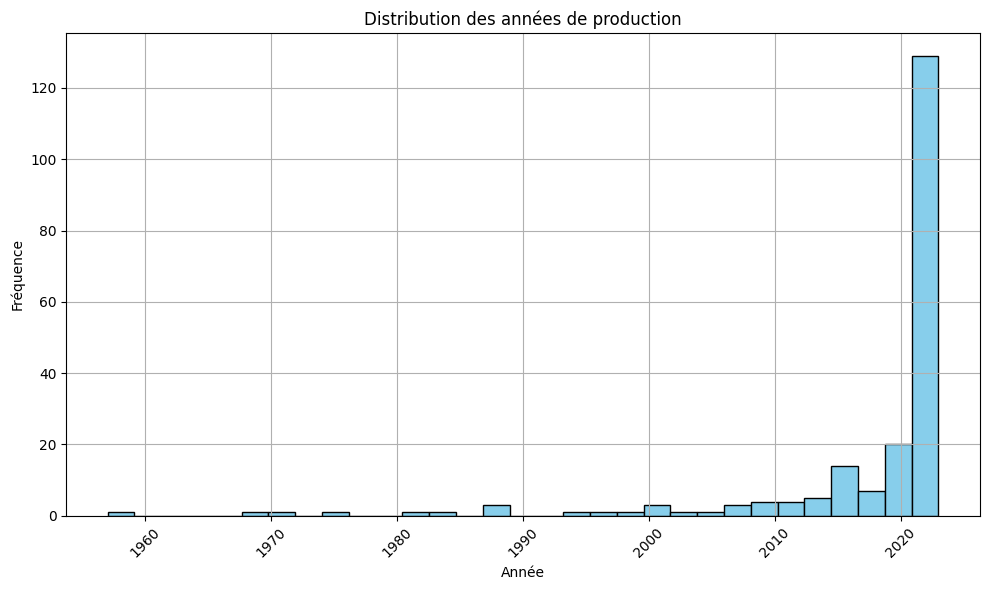

In [68]:
#import matplotlib.pyplot as plt

# Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
data[annee] = data[annee].astype(str)
all_prod_years = visualize_year_distribution(data[annee], 'Distribution des années de production')



/var/folders/sv/nvyrkmfj1bjb805g76mpfkyw0000gp/T/ipykernel_88147/3298467992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[epoque] = data[epoque].astype(str)


Non-numeric entries found: {'1969-1995 (mais uchronie...)', 'Futur', 'Tous les 33 ans ', 'Années 50', 'Futur proche', 'Sur plusieurs siecles', "Aujourd'hui ", 'années 2000', 'Actuel ', 'nan', 'Années 2010/2020', 'notre époque', 'Milieu du XXI siècle', 'Contemporain ', '+/- 1930', 'Futur très proche', 'Actuelle', 'Contemporain'}


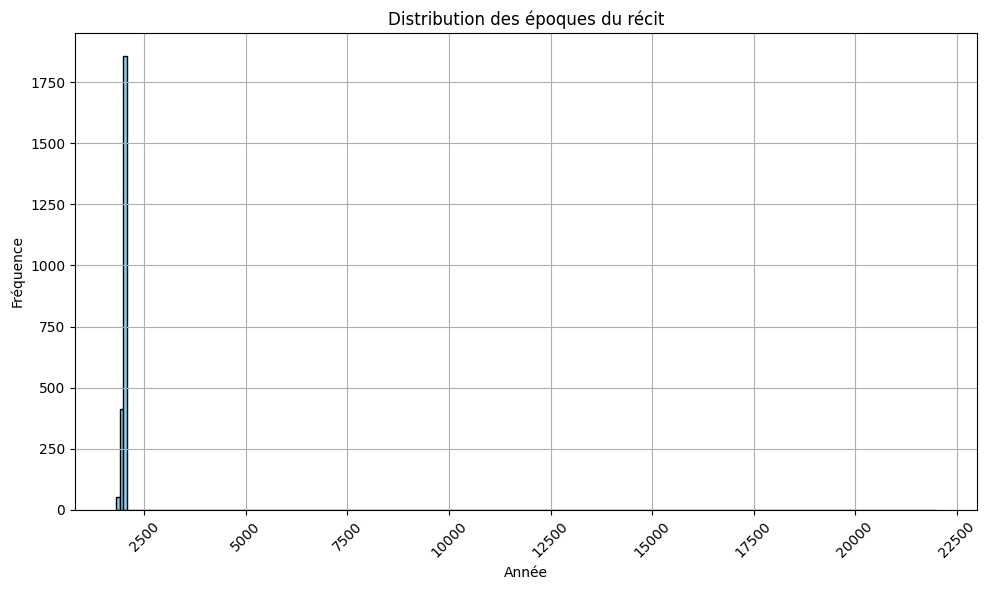

In [69]:
epoque = "EPOQUE DU RECIT"

# Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
data[epoque] = data[epoque].astype(str)
all_years = visualize_year_distribution(data[epoque], 'Distribution des époques du récit')




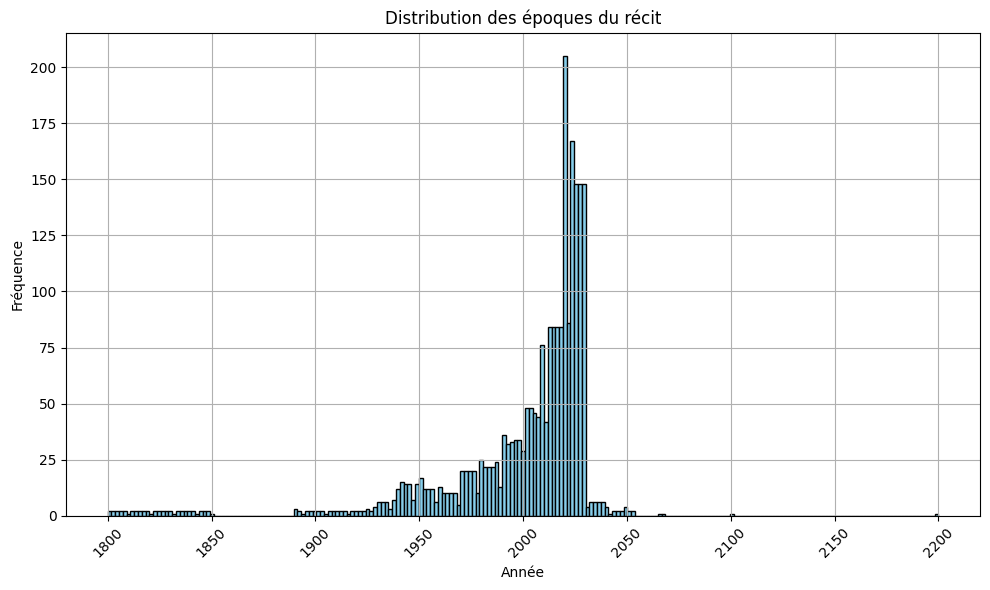

In [70]:
# keep years under 2500
before2500 = [x for x in all_years if x < 2500]
df = pd.DataFrame(before2500, columns=['Année']) 
all_years_before_2500 = visualize_year_distribution(df['Année'], 'Distribution des époques du récit')

In [71]:
# Future dates
# keep years after 2500
[x for x in all_years if x >= 2500]

[22000]

In [72]:
import matplotlib.pyplot as plt

co2 = data["EMPREINTE PERSO"]
c = co2.value_counts()
c.index


Index(['Entre 2 et 10 tonnes', 'Entre 10 et 30 tonnes', 'Entre 0 et 2 tonnes',
       'Entre 30 et 80 tonnes', 'Au-delà de 80 tonnes'],
      dtype='object', name='EMPREINTE PERSO')

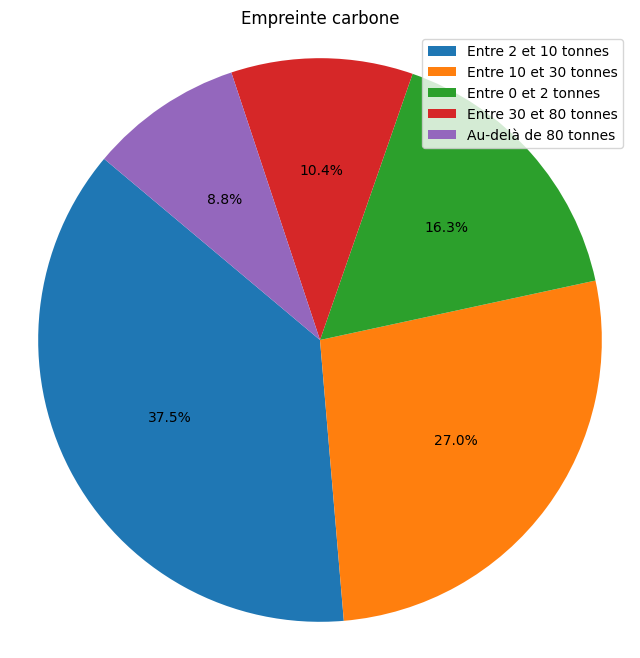

In [73]:
# Construction du camembert
plt.figure(figsize=(8, 8))
plt.pie(c, autopct='%1.1f%%', startangle=140)
plt.title("Empreinte Personnelle")

plt.axis('equal')  # S'assure que le camembert est dessiné comme un cercle.
plt.title('Empreinte carbone')
plt.legend(c.index)
plt.show()


In [74]:
duplicate_columns = data.columns[data.columns.duplicated()]
print("Duplicate Columns:", duplicate_columns)

Duplicate Columns: Index([                      'GENRE',                           nan,
                                 nan,                           nan,
                                 nan,                           nan,
                                 nan,                           nan,
                                 nan,                           nan,
                                 nan,                           nan,
                                 nan,                           nan,
                                 nan,                           nan,
       'CONSOMMATION & MATERIALISME',                'MODES DE VIE',
                 'RAPPORT AU VIVANT',      'CRISE ENVIRONNEMENTALE'],
      dtype='object', name=0)


In [75]:
# Remove duplicate columns
data = data.drop(columns=duplicate_columns)

# Display the cleaned DataFrame
print(data)

0                             TITRE ANNEE    PAYS            CANAL  TYPE  \
1                          Une nuit  2023  France  SALLE DE CINÉMA  FILM   
2                               NaN   nan     NaN              NaN   NaN   
3                               NaN   nan     NaN              NaN   NaN   
4                               NaN   nan     NaN              NaN   NaN   
5     David Brent, Life on the road  2016      UK          NETFLIX  FILM   
...                             ...   ...     ...              ...   ...   
1660                    Contenu 995   nan     NaN              NaN   NaN   
1661                    Contenu 996   nan     NaN              NaN   NaN   
1662                    Contenu 997   nan     NaN              NaN   NaN   
1663                    Contenu 998   nan     NaN              NaN   NaN   
1664                    Contenu 999   nan     NaN              NaN   NaN   

0    SAISON LIEU(X) DE L'ACTION EPOQUE DU RECIT        TRAITEMENT DU RECIT  \
1       N

In [76]:
test = 1 if 2>0 else 0
print(test)

1


In [91]:
#data["Genres"] = "genre manquant"


data["Genres"] = (
    data['Genre']
    .apply(lambda s: s if isinstance(s,str) and s not in ("",", ") else "genre manquant")
    .apply(lambda s: [e for e in s.split(", ") if e != ""])

)



In [92]:
data2= data.explode(["Genres"])
data2.head()

,TITRE,ANNEE,PAYS,CANAL,TYPE,SAISON,LIEU(X) DE L'ACTION,EPOQUE DU RECIT,TRAITEMENT DU RECIT,TYPE DE MONDE,...,Traitement,Monde,Genre,Conso,Vie,Vivant,Climat,Recul,Nécessité,Genres
1,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,...,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",Comédie-romantique
2,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",Comédie-romantique
3,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",Comédie-romantique
4,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre...",Comédie-romantique
5,"David Brent, Life on the road",2016,UK,NETFLIX,FILM,NaN,UK,2010-2020,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,...,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie,-1,1,0,0,"Peut-être un peu, en filigrane, par petites to...",Tout n'était pas indispensable,Comédie


In [96]:
import matplotlib.pyplot as plt

genre = data2['Genres']
c = data2['Genres'].value_counts()
c.index


Index(['genre manquant', 'Drame', 'Comédie', 'Thriller / Policier',
       'Science-fiction', 'Action', 'Comédie-romantique', 'Fantastique',
       'Historique', 'Documentaire', 'Biopic', 'anticipation', 'Pénal',
       'Dessin animé ', 'Télé-réalité ', 'Militant', 'Aventure',
       'Fiction réaliste ', 'Feel good', 'Documentaire romancé', 'Horreur'],
      dtype='object', name='Genres')

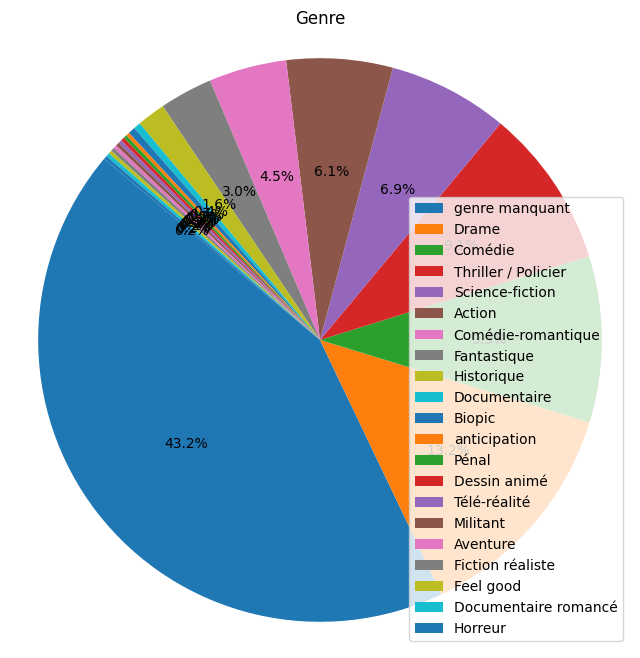

In [97]:
# Construction du camembert genre
plt.figure(figsize=(8, 8))
plt.pie(c, autopct='%1.1f%%', startangle=140)
plt.title('Genre')

plt.axis('equal')  # S'assure que le camembert est dessiné comme un cercle.
plt.title('Genre')
plt.legend(c.index)
plt.show()